### Mni-Batch
使用批量梯度下降算法是数据量较大时一种比较快速的计算和训练方法, 我们上面神经网络的主要计算过程都是矩阵W和向量x的乘法运算, 如果我们把多个列向量x排成矩阵, 运算就变成矩阵乘矩阵. 矩阵和矩阵的计算比起矩阵和向量进行多次计算更为有效率. 在对拥有k个列向量的矩阵X前向传播计算梯度时, 我们对每个单独的向量x对应的dW和db求和, 就能一次性更新k步. 
### SGD with moentum
我们优化神经网络的一种有效方法是使用带动量的随机梯度下降，每次参数更新不是完全用当前的梯度，而是基于原本的下降方向作出调整。这样可以确定一个比较稳定的下降方向，本质上是共轭梯度法的简化版本。共轭梯度法希望通过方向修正，让所有的下降方向尽可能正交。而如果我们把修正系数设为常数，就是SGD with moentum算法。
$$ d \leftarrow \beta d+(1-\beta)\frac{\partial L}{\partial W}$$
$$ W \leftarrow W-\alpha d $$
### Affine 
$$ forward\  rule\qquad y = xW+b $$
$$ W\ backward\  rule\qquad \frac{\partial L}{\partial W} = x^T\frac{\partial L}{\partial y} $$
$$ b\ backward\  rule\qquad \frac{\partial L}{\partial b} = SUMROW \frac{\partial L}{\partial y} $$
$$ x\ backward\  rule\qquad \frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} W^T $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
path = os.getcwd()
os.chdir('..')
from deepnotes import *
os.chdir(path)
%matplotlib inline

Text(0.5,1,'linear regression')

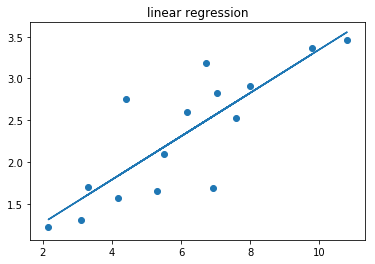

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

model = Linear(1,1)
loss_func = MSELoss()
optimizer = SGD(0.1,0.9)
optimizer.add_module(model)

for t in range(1000):
    y_hat = model(x_train)
    loss,dy_hat = loss_func(y_hat,y_train)
    model.zero_grad()
    model.backward(dy_hat)
    optimizer.step()
    
y_pred = model(x_train)
plt.plot(x_train,y_pred)
plt.scatter(x_train,y_train)
plt.title('linear regression')

### Softmax
之前我们学习线性模型时，一般会构造多个判别器来实现多分类，但是神经网络有着更好的做法。我们知道神经网络允许多输出，那么能不能让神经网络直接输出每个类别的概率呢？答案是可以，为此我们要引入一个特殊的软化概率函数，以及BCEloss的原型，Cross Entropy Loss。  
softmax是有限项离散概率分布的梯度对数归一化，也被称为归一化指数函数。softmax的计算如下$$ p_j = \sigma(x)_j = \frac{e^{x_j}}{\sum_{i=1}^n e^{x_i}} $$
函数的输入是从K个不同的线性函数得到的结果，而样本向量 x 属于第 j 个分类的概率为softmax的输出。它相当于让神经网络输出了一个离散条件概率分布
$$ p(x\ |inputs,w) $$
即给定输入X和模型参数W下分类为z的概率，而我们在分类问题中希望优化的目标是:让训练集的真实条件概率分布和模型输出的概率分布尽可能相同。我们知道评估概率分布差异的方法是KL散度，而最优化KL散度的过程又可以简化为优化Cross Entropy的过程。离散概率分布的交叉熵写做
$$  L(W) = -\sum_{i=1}^{n}log(p(x^{(i)})_{y^{(i)}}) $$
它是模型接收第i个训练集后，我们预期的正确分类的概率的负对数的加和平均。我们假设训练集是从p(x)的真实采样，则此方法获得的是真实交叉熵的蒙特卡洛估计。把softmax的输出代入，可以计算单个样本输入时，L(W)的导数。
$$  L(W) = -log(p_y) $$
$$ \frac{\partial{L}}{\partial{p_i}} = -\frac{1}{p_i} \quad \quad (i=y) \quad (1)$$
$$ \frac{\partial{L}}{\partial{p_i}} = 0 \quad \quad (i\neq y) \quad (2)$$
计算p_i关于x_j的偏导数，要分为i=j和i!=j讨论
$$ \frac{\partial{p_i}}{\partial{x_j}} = \frac{-e^{x_i}e^{x_j}}{(\sum_{k=1}^m e^{x_k})^2}=-p_i p_j \quad \quad (i\neq j)  \quad (3)$$
$$ \frac{\partial{p_i}}{\partial{x_i}} = \frac{e^{x_i}\sum_{k=1}^m e^{x_k}-(e^{x_i})^2}{(\sum_{k=1}^m e^{x_k})^2}=p_i-p_i^2 \quad \quad (i = j)  \quad (4)$$
组合上式(1),(2),(3),(4)则能得到L关于x_j的偏导数。
$$ \frac{\partial{L}}{\partial{x_j}} = \frac{\partial{L}}{\partial{p_y}} \frac{\partial{p_y}}{\partial{x_j}}$$
$$ \frac{\partial{L}}{\partial{x_j}} = -\frac{1}{p_y}(-p_y p_j)=p_j  \quad \quad (y \neq j) $$
$$ \frac{\partial{L}}{\partial{x_j}} = -\frac{1}{p_y}(p_j-p_j^2)=p_j-1 \quad \quad (y = j)$$
如果把标签写成one hot的向量，即正确标签为1，错误标签为0，就能给出非常简单的向量梯度形式
$$ \frac{\partial{L}}{\partial{x}} = p-one\_hot\_labels $$
我们实现一个结合softmax和交叉熵的层，就可以直接计算损失和进行反向传播，这样就能训练多分类任务的神经网络了。

### MNIST图像分类
一个经典的图像识别任务是分类MNIST的10种手写数字的图像，这里搭建linear+relu的神经网络实现之

In [3]:
import tensorflow as tf

# load mnist dataset
(x_train_origin,t_train_origin),(x_test_origin,t_test_origin) = tf.keras.datasets.mnist.load_data()

# batch data loader
X_train,X_test = x_train_origin/255.,x_test_origin/255.
batch_size = 100

train_loader = DataLoader(X_train,t_train_origin,batch_size)
test_loader = DataLoader(X_test,t_test_origin,batch_size)

C:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Epoch [1/5], Step [100/600], Loss: 1.3284
Epoch [1/5], Step [200/600], Loss: 0.6981
Epoch [1/5], Step [300/600], Loss: 0.5365
Epoch [1/5], Step [400/600], Loss: 0.4916
Epoch [1/5], Step [500/600], Loss: 0.4466
Epoch [1/5], Step [600/600], Loss: 0.3707
Epoch [2/5], Step [100/600], Loss: 0.3734
Epoch [2/5], Step [200/600], Loss: 0.3809
Epoch [2/5], Step [300/600], Loss: 0.3575
Epoch [2/5], Step [400/600], Loss: 0.3667
Epoch [2/5], Step [500/600], Loss: 0.3560
Epoch [2/5], Step [600/600], Loss: 0.3065
Epoch [3/5], Step [100/600], Loss: 0.3172
Epoch [3/5], Step [200/600], Loss: 0.3314
Epoch [3/5], Step [300/600], Loss: 0.3178
Epoch [3/5], Step [400/600], Loss: 0.3313
Epoch [3/5], Step [500/600], Loss: 0.3260
Epoch [3/5], Step [600/600], Loss: 0.2823
Epoch [4/5], Step [100/600], Loss: 0.2939
Epoch [4/5], Step [200/600], Loss: 0.3094
Epoch [4/5], Step [300/600], Loss: 0.2994
Epoch [4/5], Step [400/600], Loss: 0.3135
Epoch [4/5], Step [500/600], Loss: 0.3104
Epoch [4/5], Step [600/600], Loss:

Text(0.5,1,'train loss (Cross Entropy)')

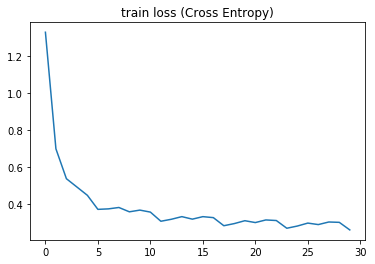

In [4]:
num_epochs = 5
total_step = len(train_loader)

model = Linear(28*28,10)
loss_func = CrossEntropyLossWithSoftMax(10)
optimizer = Adam(0.001)
optimizer.add_module(model)

loss_list = []
log_step = 100 

for epoch in range(num_epochs):
    running_loss = 0.
    for i in range(total_step):
        x,y = train_loader.get_batch()
        x = x.reshape(x.shape[0],-1)
        # Forward pass
        logits = model(x)
        # calculate loss
        loss,dlogits = loss_func(logits,y)
        # Backward
        model.zero_grad()
        model.backward(dlogits)
        # optimize
        optimizer.step()
        
        running_loss += loss.item()
        
        if (i+1) % log_step == 0:
            running_loss/=log_step
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, running_loss))
            loss_list.append(running_loss)
            running_loss = 0.

plt.plot(loss_list)
plt.title('train loss (Cross Entropy)')

In [5]:
correct = 0
total = 0

for i in range(len(test_loader)):
    x,y = test_loader.get_batch()
    x = x.reshape(x.shape[0],-1)
    outputs = model(x)
    predicted = np.argmax(outputs, axis = 1)
    total += y.shape[0]
    correct += (predicted == y).sum()
    
print('Accuracy of the network on the 10000 test images: %.2f %%'%(100 * correct / total))

Accuracy of the network on the 10000 test images: 92.16 %
